In [84]:
import pandas as pd
import seaborn as srn
import statistics  as sts
dataset = pd.read_csv("tempo.csv", sep = ";")
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [87]:
## Tratando a aparencia
agrupado = dataset.groupby(['Aparencia']).size()
dataset.loc[dataset['Aparencia'] == "menos",'Aparencia'] = "sol"
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [88]:
## Tratando a Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [90]:
mediana = sts.median(dataset['Temperatura'])
dataset.loc[(dataset['Temperatura'] < -135) | (dataset['Temperatura'] > 130),'Temperatura'] = mediana
dataset['Temperatura']

0     85.0
1     80.0
2     83.0
3     70.0
4     68.0
5     65.0
6     64.0
7     73.5
8     69.0
9     75.0
10    75.0
11    72.0
12    81.0
13    71.0
Name: Temperatura, dtype: float64

In [91]:
dataset.isna().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [95]:
#3 Tratando o Vento
dataset.groupby(['Vento']).size()
dataset['Vento'].fillna('FALSO',inplace=True)
dataset['Vento']

0          FALSO
1     VERDADEIRO
2          FALSO
3          FALSO
4          FALSO
5     VERDADEIRO
6     VERDADEIRO
7          FALSO
8          FALSO
9          FALSO
10    VERDADEIRO
11    VERDADEIRO
12         FALSO
13    VERDADEIRO
Name: Vento, dtype: object

In [96]:
dataset.isna().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          0
Jogar          0
dtype: int64

In [100]:
## Tratando a Umidade
dataset['Umidade']
mediana = sts.median(dataset['Umidade'])
dataset['Umidade'].fillna(mediana,inplace=True)
dataset.loc[(dataset['Umidade'] < 0 ) | (dataset['Umidade'] > 100),'Umidade'] = mediana
dataset['Umidade']

0     85.00
1     90.00
2     86.00
3     85.50
4     80.00
5     70.00
6     65.00
7     95.00
8     70.00
9     85.25
10    70.00
11    90.00
12    75.00
13    91.00
Name: Umidade, dtype: float64

In [101]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.00,FALSO,nao
1,sol,80.0,90.00,VERDADEIRO,nao
2,nublado,83.0,86.00,FALSO,sim
3,chuva,70.0,85.50,FALSO,sim
4,chuva,68.0,80.00,FALSO,sim
5,chuva,65.0,70.00,VERDADEIRO,nao
6,sol,64.0,65.00,VERDADEIRO,sim
7,sol,73.5,95.00,FALSO,nao
8,sol,69.0,70.00,FALSO,sim
9,chuva,75.0,85.25,FALSO,sim


<AxesSubplot:xlabel='Vento'>

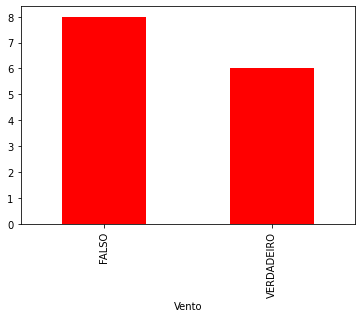

In [105]:
agrupado = dataset.groupby(['Vento']).size()
agrupado.plot.bar(color='red')

d:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperatura', ylabel='Density'>

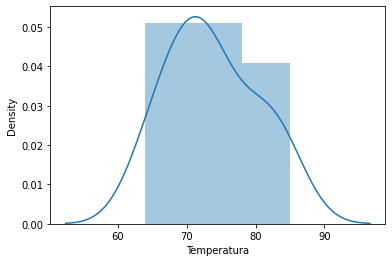

In [111]:
srn.distplot(dataset['Temperatura'])